<a href="https://colab.research.google.com/github/tanvi0605/Image-Analysis-for-Automated-Product-Recognition/blob/main/Testing_Fruit_veg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np   #7
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')   #upload h5 model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
cnn = tf.keras.models.load_model('/content/trained_model.h5')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


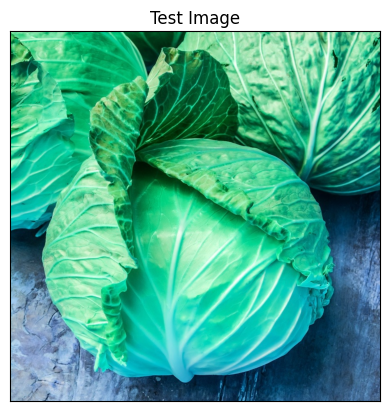

In [10]:
import cv2
image_path = "/content/drive/MyDrive/fruit and vegetable recognition/test/cabbage/Image_6.jpg"
img = cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


In [12]:
print(predictions)

[[1.83281734e-22 4.76688522e-19 7.89327639e-19 1.67853343e-17
  1.00000000e+00 2.93249772e-24 2.81354911e-15 3.91315611e-25
  4.98525105e-22 1.26638371e-20 9.58827296e-21 8.64395864e-22
  2.22175253e-18 8.55832727e-21 1.55437835e-20 2.51722848e-19
  6.24043795e-16 8.67878005e-15 9.68237202e-20 3.22676170e-21
  9.04267642e-20 9.17547267e-22 2.27251112e-21 1.14733136e-17
  1.74147772e-21 1.00393322e-11 2.91481582e-27 1.33053215e-24
  1.95444144e-16 5.38801209e-13 1.11266627e-13 8.97781286e-21
  1.41114223e-28 5.83808284e-26 1.24190664e-23 5.10860058e-20]]


In [14]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit and vegetable recognition/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [15]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

4


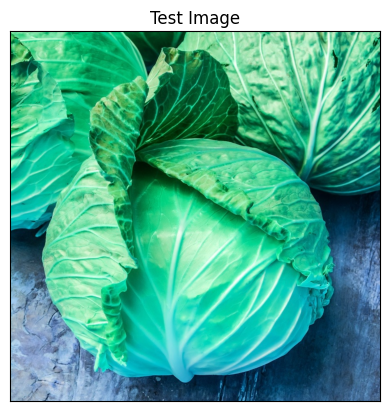

In [16]:
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [17]:
print("It's a {}".format(test_set.class_names[result_index]))

It's a cabbage


In [18]:
cnn.save('load.h5')